# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [ ]:
"""" --------------------------------------------------------------------------------------------
 Date:     7/11/2019
 Pgm Name: PyWeather   
 Input:    
           
 Desc:     Python script builds a series of scatter plots to showcase the following relationships:
           Temperature (F) vs. Latitude
           Humidity (%) vs. Latitude
           Cloudiness (%) vs. Latitude
           Wind Speed (mph) vs. Latitude
"""" ---------------------------------------------------------------------------------------------

In [21]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
import csv

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [22]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
#pprint(cities)

623

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [23]:
#url for GET requests to retrieve weather data

url = "http://api.openweathermap.org/data/2.5/weather?"
units="imperial"

query_url = f"{url}appid={api_key}&units={units}&q="
#query_url = url + "appid=" + api_key + "&units=" + units + "&q="

# Get weather data
weather_response = requests.get(query_url)
weather_json = weather_response.json()

print(query_url)


http://api.openweathermap.org/data/2.5/weather?appid=f515329b7cbe9101a3700b2593df3658&units=imperial&q=


In [24]:
#create lists for each column
# append in a for loop

city_names = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

rec_counter = 0
rec_not_found = 0

#City	Cloudiness	Country	Date	Humidity	Lat	Lng	Max Temp	Wind Speed

print("Begin Weather Data Retrieval")
print("----------------------------")

# Loop through the list of cities and perform a request for data on each
for city in cities:
    rec_counter+= 1 
    try:
        response = requests.get(query_url + city).json()
        prnt_query = query_url + city
        print(f"Processing record nbr {rec_counter} for city {city}")
        
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]['humidity'])    
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])    
        max_temp.append(response["main"]["temp_max"])
        wind_speed.append(response["wind"]["speed"])
        city_names.append(city)        
    except requests.exceptions.RequestException as err:
        print ("OOps: Something Else",err)
        rec_not_found += 1
        print(f"City not found skipping....{rec_not_found}")
    except requests.exceptions.HTTPError as errh:
        print ("Http Error:",errh)
        rec_not_found += 1
        print(f"City not found skipping....{rec_not_found}")
    except requests.exceptions.ConnectionError as errc:
        print ("Error Connecting:",errc)
        rec_not_found += 1
        print(f"City not found skipping....{rec_not_found}")       
    except requests.exceptions.Timeout as errt:
        rec_not_found += 1
        print(f"City not found skipping....{rec_not_found}")
        print ("Timeout Error:",errt)       
    except Exception:      
        rec_not_found += 1
        print(f"City not found skipping....{rec_not_found}")
        print ("Error Exception:")  

print("End   Weather Data Retrieval")
print("----------------------------")

print(f"Print query url:  {prnt_query}")
print(f"There are {rec_counter} city records and {rec_not_found} were not found")

Begin Weather Data Retrieval
----------------------------
Processing record nbr 1 for city puerto ayora
Processing record nbr 2 for city chokurdakh
Processing record nbr 3 for city rikitea
Processing record nbr 4 for city dipkarpaz
City not found skipping....1
Error Exception:
Processing record nbr 5 for city upernavik
Processing record nbr 6 for city provideniya
Processing record nbr 7 for city yellowknife
Processing record nbr 8 for city nizhneyansk
City not found skipping....2
Error Exception:
Processing record nbr 9 for city kirakira
Processing record nbr 10 for city airai
Processing record nbr 11 for city grand river south east
City not found skipping....3
Error Exception:
Processing record nbr 12 for city port-gentil
Processing record nbr 13 for city samalaeulu
City not found skipping....4
Error Exception:
Processing record nbr 14 for city bluff
Processing record nbr 15 for city atuona
Processing record nbr 16 for city busselton
Processing record nbr 17 for city angra
City not fo

Processing record nbr 165 for city san carlos de bariloche
Processing record nbr 166 for city tuatapere
Processing record nbr 167 for city vaitupu
City not found skipping....22
Error Exception:
Processing record nbr 168 for city artyk
City not found skipping....23
Error Exception:
Processing record nbr 169 for city constanta
Processing record nbr 170 for city grand gaube
Processing record nbr 171 for city maceio
Processing record nbr 172 for city mys shmidta
City not found skipping....24
Error Exception:
Processing record nbr 173 for city portland
Processing record nbr 174 for city atbasar
Processing record nbr 175 for city port hueneme
Processing record nbr 176 for city korem
Processing record nbr 177 for city kisangani
Processing record nbr 178 for city charters towers
Processing record nbr 179 for city sinjar
Processing record nbr 180 for city clyde river
Processing record nbr 181 for city tezu
Processing record nbr 182 for city port elizabeth
Processing record nbr 183 for city kulh

Processing record nbr 329 for city fairbanks
Processing record nbr 330 for city doka
Processing record nbr 331 for city ceres
Processing record nbr 332 for city kedrovyy
Processing record nbr 333 for city puerto suarez
Processing record nbr 334 for city yeppoon
Processing record nbr 335 for city bahia blanca
Processing record nbr 336 for city sogdiondon
City not found skipping....42
Error Exception:
Processing record nbr 337 for city boali
Processing record nbr 338 for city traverse city
Processing record nbr 339 for city ostrovnoy
Processing record nbr 340 for city sapao
City not found skipping....43
Error Exception:
Processing record nbr 341 for city tawkar
City not found skipping....44
Error Exception:
Processing record nbr 342 for city san cristobal
Processing record nbr 343 for city padang
Processing record nbr 344 for city santo domingo
Processing record nbr 345 for city cobija
Processing record nbr 346 for city louisbourg
City not found skipping....45
Error Exception:
Processing

Processing record nbr 496 for city finschhafen
Processing record nbr 497 for city dukat
Processing record nbr 498 for city santiago
Processing record nbr 499 for city stornoway
City not found skipping....60
Error Exception:
Processing record nbr 500 for city safita
Processing record nbr 501 for city sibolga
Processing record nbr 502 for city araxa
Processing record nbr 503 for city belomorsk
Processing record nbr 504 for city ondorhaan
City not found skipping....61
Error Exception:
Processing record nbr 505 for city mangrol
Processing record nbr 506 for city coffeyville
Processing record nbr 507 for city la reforma
Processing record nbr 508 for city karratha
Processing record nbr 509 for city taybad
Processing record nbr 510 for city evensk
Processing record nbr 511 for city nishihara
Processing record nbr 512 for city linkou
Processing record nbr 513 for city verkhoyansk
Processing record nbr 514 for city belaya gora
Processing record nbr 515 for city kolokani
Processing record nbr 51

In [26]:
#pprint(city_names)
len(lat)
len(city_names)

558

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [27]:
# create a data frame 
weather_dictionary = {
    "city_names": city_names,
    "cloudinesss": cloudiness,
    "country": country,
    "date": date,
    "humidity": humidity,
    "lat": lat,
    "lng": lng,
    "max_temp": max_temp,
    "wind_speed": wind_speed    
}
weather_data = pd.DataFrame(weather_dictionary)
weather_data.head()

,city_names,cloudinesss,country,date,humidity,lat,lng,max_temp,wind_speed
0,puerto ayora,75,EC,1562863183,69,-0.74,-90.35,77.00,17.22
1,chokurdakh,99,RU,1562863316,93,70.62,147.90,56.19,13.65
2,rikitea,69,PF,1562863300,82,-23.12,-134.97,73.65,17.27
3,upernavik,83,GL,1562863314,72,72.79,-56.15,44.85,4.92
4,provideniya,0,RU,1562863695,49,64.42,-173.23,67.17,0.92


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

Text(0.5, 1.0, 'City Latitude vs Max Temperatures ')

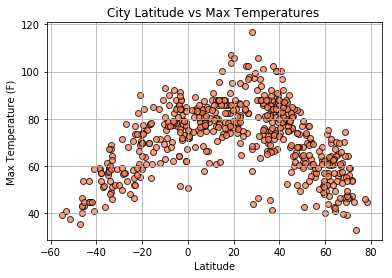

In [28]:
# Build the scatter plots 
# include the latitude and max temperatures
plt.scatter(lat, max_temp, c="coral", alpha=0.75,edgecolors="black",label="lat")
plt.grid()

# Incorporate the other graph properties
# add labels and title
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs Max Temperatures ")

#### Latitude vs. Humidity Plot

Text(0.5, 1.0, 'City Latitude vs Humidity ')

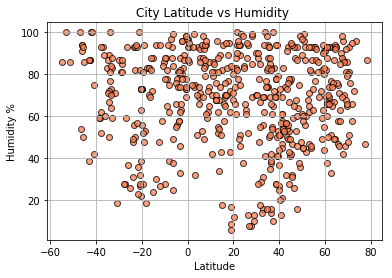

In [29]:
# Build the scatter plots 
# include the latitude and humidity
plt.scatter(lat, humidity, c="coral", alpha=0.75,edgecolors="black",label="lat")
plt.grid()

# Incorporate the other graph properties
# add labels and title
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.title("City Latitude vs Humidity ")

#### Latitude vs. Cloudiness Plot

Text(0.5, 1.0, 'City Latitude vs Cloudiness ')

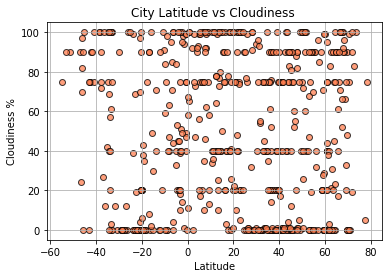

In [31]:
# Build the scatter plots 
# include the latitude and cloudiness
plt.scatter(lat, cloudiness, c="coral", alpha=0.75,edgecolors="black",label="lat")
plt.grid()

# Incorporate the other graph properties
# add labels and title
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.title("City Latitude vs Cloudiness ")

#### Latitude vs. Wind Speed Plot

In [ ]:
Max Temperature (F)

Text(0.5, 1.0, 'City Latitude vs Wind Speed ')

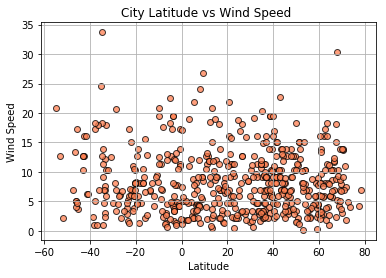

In [32]:
# Build the scatter plots 
# include the latitude and cloudiness
plt.scatter(lat, wind_speed, c="coral", alpha=0.75,edgecolors="black",label="lat")
plt.grid()

# Incorporate the other graph properties
# add labels and title
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("City Latitude vs Wind Speed ")

In [19]:
# Write Weather city data
weather_data.to_csv("weather.csv", encoding="utf-8", index=False)
df = pd.read_csv("weather.csv")
df.head()

,city_names,cloudinesss,country,date,humidity,lat,lng,max_temp,wind_speed
0,ribeira grande,20,PT,1562858885,78,38.52,-28.70,73.40,5.82
1,punta arenas,90,CL,1562858885,93,-53.16,-70.91,41.00,12.75
2,rumphi,89,MW,1562858885,35,-11.02,33.86,73.13,11.14
3,aklavik,90,CA,1562858886,75,68.22,-135.01,46.40,6.93
4,roald,31,NO,1562858886,82,62.58,6.12,69.01,19.46


In [20]:
export_csv = df.to_csv (r'c:\output_data\cities.csv', index=None, header=True)

In [ ]:
Observable trends:
    
    In some cases, the higher temperatures appear to be associated with higher
    humidity
    the humidity is variable and has a spread throughout the map  
    the wind speeds are clustered in lat -40 through 75
    
    